In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np, jdcal
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import griddata
import scipy.ndimage
from matplotlib.gridspec import GridSpec

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [27]:
from astropy.io import fits
from astropy.visualization import LogStretch, AsinhStretch, ZScaleInterval, ImageNormalize
import numpy as np

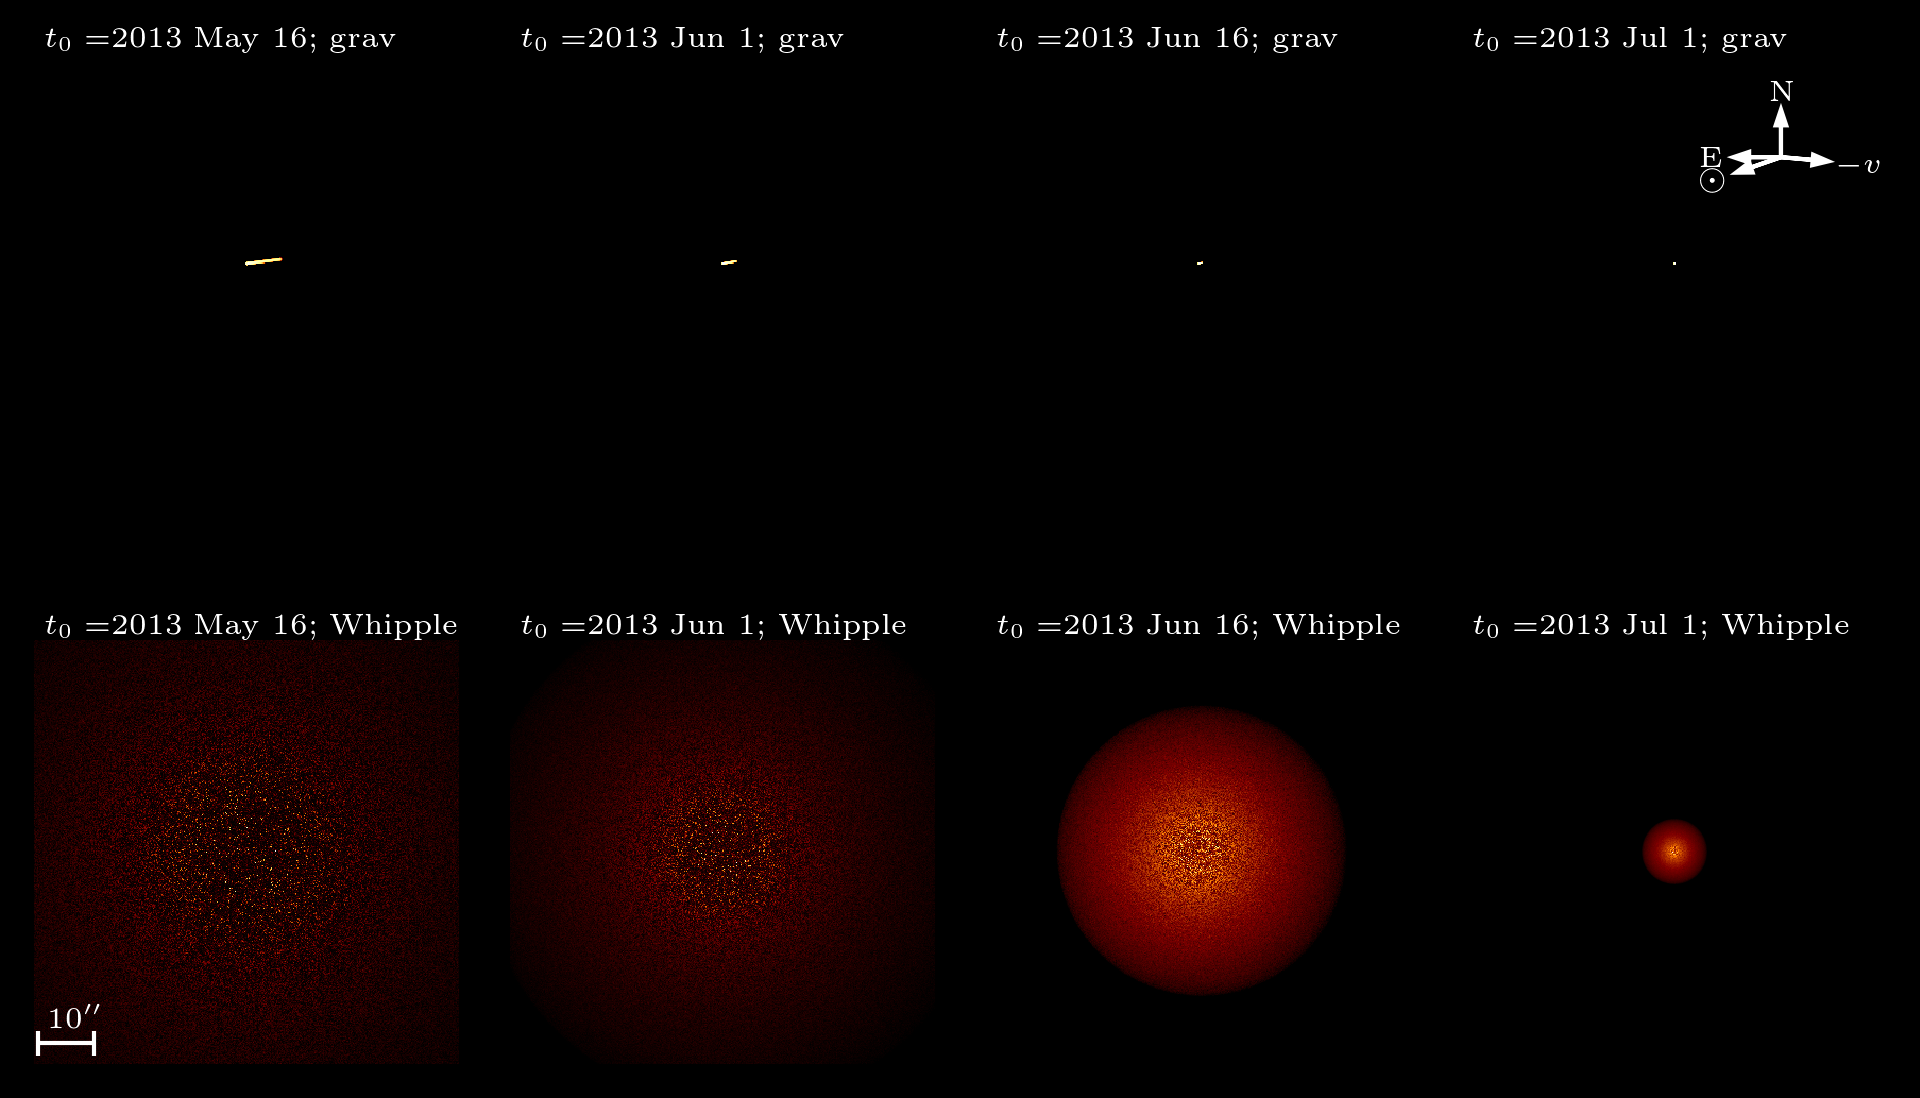

In [42]:
from matplotlib import gridspec
import glob

fig = plt.figure(figsize=(6.5, 4.5), dpi=300)
fig.patch.set_facecolor('black')
gs=GridSpec(2, 4)

fitsfiles = sorted(glob.glob('coma_sim/*.fits'))

for i, ii in enumerate(fitsfiles):
    
    ax = fig.add_subplot(gs[i%2, int(np.floor(i/2))])
    
    ax.set_autoscale_on(False)

    ax.clear()
    ax.set_axis_off()
    
    cmap = 'afmhot'
    hdu_list = fits.open(ii)
    header = hdu_list[0].header
    image = hdu_list[0].data
    norm = ImageNormalize(image, stretch=LogStretch())
    
    ax.imshow(image, cmap=cmap, norm=norm, origin='lower')
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
    if i == 0:
        ax.text(10, 400, r'$t_0=$2013 May 16; grav', fontsize='x-small', color='w')
    elif i == 1:
        ax.text(10, 400, r'$t_0=$2013 May 16; Whipple', fontsize='x-small', color='w')
    elif i == 2:
        ax.text(10, 400, r'$t_0=$2013 Jun 1; grav', fontsize='x-small', color='w')
    elif i == 3:
        ax.text(10, 400, r'$t_0=$2013 Jun 1; Whipple', fontsize='x-small', color='w')
    elif i == 4:
        ax.text(10, 400, r'$t_0=$2013 Jun 16; grav', fontsize='x-small', color='w')
    elif i == 5:
        ax.text(10, 400, r'$t_0=$2013 Jun 16; Whipple', fontsize='x-small', color='w')
    elif i == 6:
        ax.text(10, 400, r'$t_0=$2013 Jul 1; grav', fontsize='x-small', color='w')
    elif i == 7:
        ax.text(10, 400, r'$t_0=$2013 Jul 1; Whipple', fontsize='x-small', color='w')
    
    if i == 1:
        ax.errorbar(30, 20, xerr=26.7, lw=1, capsize=3, color='w')
        ax.text(15, 34, r"$10''$", fontsize='x-small', color='w')
    elif i == 6:
        
        psang = 289-90
        psamv = 265-90+180

        ax.arrow(300, 300, 30*np.cos(np.deg2rad(psang)), 30*np.sin(np.deg2rad(psang)), color='w', head_width=10)
        ax.text(224, 270, '$\odot$', color='w', fontsize='small', weight='black')

        ax.arrow(300, 300, 30*np.cos(np.deg2rad(psamv)), 30*np.sin(np.deg2rad(psamv)), color='w', head_width=10)
        ax.text(354, 290, '$-v$', color='w', fontsize='x-small', weight='black')

        ax.arrow(300, 300, -30, 0, color='w', head_width=10)
        ax.arrow(300, 300, 0, 30, color='w', head_width=10)
        ax.text(224, 292, 'E', color='w', fontsize='x-small', weight='black')
        ax.text(290, 354, 'N', color='w', fontsize='x-small', weight='black')

fig.tight_layout()
plt.savefig('coma_model.pdf', facecolor='k')
plt.show()